In [1]:
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager

font = {"family": "YuGothic"}
matplotlib.rc("font", **font)

In [2]:
reverse60_single = pd.read_csv("../log-single-reverse60/nginx-minis2.csv")
reverse60_single = reverse60_single.select_dtypes(include=["int", "float"])
reverse60_single_h2_start = reverse60_single["Time"].min() + 30
reverse60_single_h2_end = 1675661949 - 30
reverse60_single_h3_start = 1675662561 + 30
reverse60_single_h3_end = reverse60_single["Time"].max() - 30
print(
    reverse60_single_h2_end - reverse60_single_h2_start,
    reverse60_single_h3_end - reverse60_single_h3_start,
)
reverse60_single.dtypes


1814 2258


Time         int64
UID          int64
PID          int64
%usr       float64
%system    float64
%guest     float64
%wait      float64
%CPU       float64
CPU          int64
dtype: object

In [3]:
client60_single = pd.read_csv("../log-single-client60/nginx-minis2.csv")
client60_single = client60_single.select_dtypes(include=['int', 'float'])
client60_single_h2_start = client60_single["Time"].min() + 30
client60_single_h2_end = 1675605220 - 30
client60_single_h3_start = 1675605833 + 30
client60_single_h3_end = client60_single["Time"].max() -30
print(
    client60_single_h2_end - client60_single_h2_start,
    client60_single_h3_end - client60_single_h3_start,
)
client60_single.dtypes

1894 2266


Time         int64
UID          int64
PID          int64
%usr       float64
%system    float64
%guest     float64
%wait      float64
%CPU       float64
CPU          int64
dtype: object

In [4]:
reverse60_simple = pd.read_csv("../log-simple-reverse60/nginx-minis2.csv")
reverse60_simple = reverse60_simple.select_dtypes(include=["int", "float"])
reverse60_simple_h2_start = reverse60_simple["Time"].min() + 30
reverse60_simple_h2_end = 1675658358 - 30
reverse60_simple_h3_start = 1675658963 + 30
reverse60_simple_h3_end = reverse60_simple["Time"].max() - 30
print(
    reverse60_simple_h2_end - reverse60_simple_h2_start,
    reverse60_simple_h3_end - reverse60_simple_h3_start,
)
reverse60_simple.dtypes

285 289


Time         int64
UID          int64
PID          int64
%usr       float64
%system    float64
%guest     float64
%wait      float64
%CPU       float64
CPU          int64
dtype: object

In [5]:
client60_simple = pd.read_csv("../log-simple-client60/nginx-minis2.csv")
client60_simple = client60_simple.select_dtypes(include=["int", "float"])
client60_simple_h2_start = client60_simple["Time"].min() + 30
client60_simple_h2_end = 1675601408 - 30
client60_simple_h3_start = 1675602012 + 30
client60_simple_h3_end = client60_simple["Time"].max() - 30
print(
    client60_simple_h2_end - client60_simple_h2_start,
    client60_simple_h3_end - client60_simple_h3_start,
)
client60_simple.dtypes


284 290


Time         int64
UID          int64
PID          int64
%usr       float64
%system    float64
%guest     float64
%wait      float64
%CPU       float64
CPU          int64
dtype: object

In [6]:
def cpu_performance(df: pd.DataFrame, start: int, end: int):
    df_groupby = df[(start <= df["Time"]) & (df["Time"] <= end)].groupby("Time")
    df_groupby = df_groupby.sum()
    return df_groupby


In [7]:
client60_single_h2 = cpu_performance(client60_single, client60_single_h2_start, client60_single_h2_end)
client60_des_single_h2 = client60_single_h2[[r"%usr", r"%system", r"%CPU"]].describe()
client60_des_single_h2.to_csv("client60-server-single-h2.csv")
client60_single_h3 = cpu_performance(client60_single, client60_single_h3_start, client60_single_h3_end)
client60_des_single_h3 = client60_single_h3[[r"%usr", r"%system", r"%CPU"]].describe()
client60_des_single_h3.to_csv("client60-server-single-h3.csv")
client60_result_single = pd.DataFrame()
client60_result_single["HTTP/2\n/single.html\n実験1"] = client60_single_h2[r"%CPU"].reset_index(drop=True)
client60_result_single["HTTP/3\n/single.html\n実験1"] = client60_single_h3[r"%CPU"].reset_index(drop=True)
client60_result_single.to_csv("client60-server-describe.csv", index=False)
client60_result_single

,HTTP/2\n/single.html\n実験1,HTTP/3\n/single.html\n実験1
0,10.0,61.0
1,31.0,53.0
2,8.0,59.0
3,14.0,58.0
4,18.0,68.0
...,...,...
1890,11.0,58.0
1891,13.0,54.0
1892,22.0,60.0
1893,17.0,55.0


In [8]:
reverse60_single_h2 = cpu_performance(reverse60_single, reverse60_single_h2_start, reverse60_single_h2_end)
reverse60_des_single_h2 = reverse60_single_h2[[r"%usr", r"%system", r"%CPU"]].describe()
reverse60_des_single_h2.to_csv("reverse60-server-single-h2.csv")
reverse60_single_h3 = cpu_performance(reverse60_single, reverse60_single_h3_start, reverse60_single_h3_end)
reverse60_des_single_h3 = reverse60_single_h3[[r"%usr", r"%system", r"%CPU"]].describe()
reverse60_des_single_h3.to_csv("reverse60-server-single-h3.csv")
reverse60_result_single = pd.DataFrame()
reverse60_result_single["HTTP/2\n/single.html\n実験3"] = reverse60_single_h2[r"%CPU"].reset_index(drop=True)
reverse60_result_single["HTTP/3\n/single.html\n実験3"] = reverse60_single_h3[r"%CPU"].reset_index(drop=True)
reverse60_result_single.to_csv("reverse60-server-describe.csv", index=False)
reverse60_result_single

,HTTP/2\n/single.html\n実験3,HTTP/3\n/single.html\n実験3
0,60.0,80.00
1,45.0,82.17
2,11.0,79.00
3,70.0,81.00
4,56.0,80.00
...,...,...
1810,35.0,79.00
1811,28.0,77.00
1812,52.0,81.00
1813,43.0,81.00


In [9]:
client60_simple_h2 = cpu_performance(
    client60_simple, client60_simple_h2_start, client60_simple_h2_end
)
client60_des_simple_h2 = client60_simple_h2[[r"%usr", r"%system", r"%CPU"]].describe()
client60_des_simple_h2.to_csv("client60-server-simple-h2.csv")
client60_simple_h3 = cpu_performance(
    client60_simple, client60_simple_h3_start, client60_simple_h3_end
)
client60_des_simple_h3 = client60_simple_h3[[r"%usr", r"%system", r"%CPU"]].describe()
client60_des_simple_h3.to_csv("client60-server-simple-h3.csv")
client60_result_simple = pd.DataFrame()
client60_result_simple["HTTP/2\n/simple.html\n実験2"] = client60_simple_h2[
    r"%CPU"
].reset_index(drop=True)
client60_result_simple["HTTP/3\n/simple.html\n実験2"] = client60_simple_h3[
    r"%CPU"
].reset_index(drop=True)
client60_result_simple.to_csv("client60-server-describe.csv", index=False)
client60_result_simple


,HTTP/2\n/simple.html\n実験2,HTTP/3\n/simple.html\n実験2
0,34.0,36.0
1,35.0,32.0
2,34.0,35.0
3,32.0,39.0
4,31.0,37.0
...,...,...
280,31.0,39.0
281,34.0,33.0
282,32.0,33.0
283,34.0,40.0


In [10]:
reverse60_simple_h2 = cpu_performance(
    reverse60_simple, reverse60_simple_h2_start, reverse60_simple_h2_end
)
reverse60_des_simple_h2 = reverse60_simple_h2[[r"%usr", r"%system", r"%CPU"]].describe()
reverse60_des_simple_h2.to_csv("reverse60-server-simple-h2.csv")
reverse60_simple_h3 = cpu_performance(
    reverse60_simple, reverse60_simple_h3_start, reverse60_simple_h3_end
)
reverse60_des_simple_h3 = reverse60_simple_h3[[r"%usr", r"%system", r"%CPU"]].describe()
reverse60_des_simple_h3.to_csv("reverse60-server-simple-h3.csv")
reverse60_result_simple = pd.DataFrame()
reverse60_result_simple["HTTP/2\n/simple.html\n実験3"] = reverse60_simple_h2[
    r"%CPU"
].reset_index(drop=True)
reverse60_result_simple["HTTP/3\n/simple.html\n実験3"] = reverse60_simple_h3[
    r"%CPU"
].reset_index(drop=True)
reverse60_result_simple.to_csv("reverse60-server-describe.csv", index=False)
reverse60_result_simple


,HTTP/2\n/simple.html\n実験3,HTTP/3\n/simple.html\n実験3
0,34.0,36.0
1,34.0,36.0
2,32.0,38.0
3,34.0,39.0
4,34.0,37.0
...,...,...
281,34.0,37.0
282,34.0,35.0
283,33.0,36.0
284,34.0,41.0


In [11]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 6))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
result = pd.concat(
    [
        client60_result_simple,
        client60_result_single,
    ],
    axis=1,
)


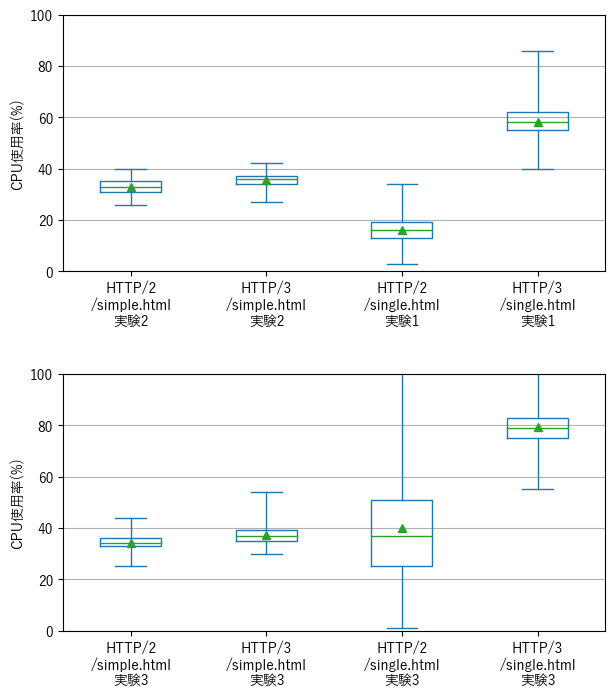

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

plot = result.plot.box(
    ax=axes[0], showmeans=True, ylabel="CPU使用率(%)", whis=[0, 100]
)
plot.set_ylim(0, 100)
plot.grid(which="major", axis="y")

result = pd.concat(
    [
        reverse60_result_simple,
        reverse60_result_single,
    ],
    axis=1,
)
plot2 = result.plot.box(
    ax=axes[1], showmeans=True, ylabel="CPU使用率(%)", whis=[0, 100]
)
plot2.set_ylim(0, 100)
plot2.grid(which="major", axis="y")


In [13]:
from scipy.stats import f
from scipy import stats
import numpy as np


def ftest(a, b):
    # 　統計量Fの計算
    v1 = np.var(a, ddof=1)
    v2 = np.var(b, ddof=1)
    n1 = len(a)
    n2 = len(b)
    f_value = v1 / v2

    # 帰無仮説が正しい場合にFが従う確率分を生成
    f_frozen = f.freeze(dfn=n1 - 1, dfd=n2 - 1)

    # 右側
    p1 = f_frozen.sf(f_value)
    # 左側
    p2 = f_frozen.cdf(f_value)
    # 小さい方の2倍がp値
    p_value = min(p1, p2) * 2

    # 統計量Fとp値を返す
    return f_value, p_value


def t_test(a, b):
    a = a.dropna()
    b = b.dropna()
    print(
        a.mean(),
        a.std(),
        b.mean(),
        b.std(),
    )
    f = ftest(
        a,
        b,
    )
    toubunsanse = (
        ftest(
            a,
            b,
        )[1]
        > 0.0005
    )
    print(f"{f=}")
    print(f"{toubunsanse=}")
    print(
        stats.shapiro(a)[1],
        stats.shapiro(b)[1],
    )
    print(
        stats.ttest_ind(
            a,
            b,
            equal_var=toubunsanse,
        )
    )

In [14]:
results = result


In [15]:
t_test(
    results["HTTP/2\n/simple.html"],
    results["HTTP/3\n/simple.html"],
)
results["HTTP/2\n/simple.html"].plot.hist()
results["HTTP/3\n/simple.html"].plot.hist()


KeyError: 'HTTP/2\n/simple.html'

16.10930870712401 4.895462890639242 58.23661213720317 5.386695999975933
f=(0.8259287659627641, 3.21289404900475e-05)
toubunsanse=False
2.763884390452609e-12 6.932284929336277e-15
Ttest_indResult(statistic=-251.94392215058608, pvalue=0.0)


<AxesSubplot: ylabel='Frequency'>

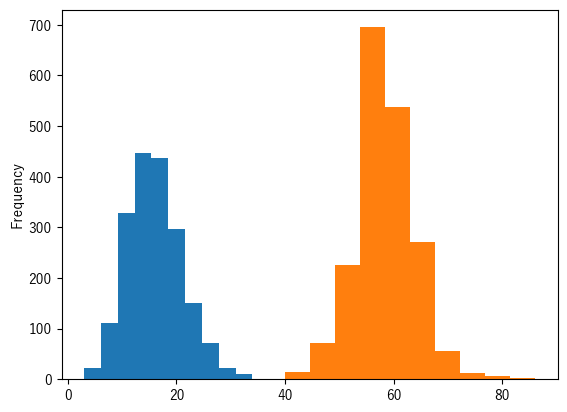

In [ ]:
t_test(
    results["HTTP/2\n/single.html"],
    results["HTTP/3\n/single.html"],
)
results["HTTP/2\n/single.html"].plot.hist()
results["HTTP/3\n/single.html"].plot.hist()